In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'Resources/crypto_market_data.csv'
df = pd.read_csv(file_path)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df[['price_change_percentage_24h', 'price_change_percentage_7d', 
                                       'price_change_percentage_14d', 'price_change_percentage_30d',
                                       'price_change_percentage_60d']])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 
                                               'price_change_percentage_14d', 'price_change_percentage_30d',
                                               'price_change_percentage_60d'], index=df['coin_id'])

# Display the first five rows of the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d
coin_id,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203


In [7]:
# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 
                                               'price_change_percentage_14d', 'price_change_percentage_30d',
                                               'price_change_percentage_60d'])

# Copy the crypto names from the original data and set the coin_id column as index
scaled_df['coin_id'] = df['coin_id']
scaled_df.set_index('coin_id', inplace=True)

# Display the first five rows of the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d
coin_id,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203


---

### Find the Best Value for k Using the Original Data.

c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

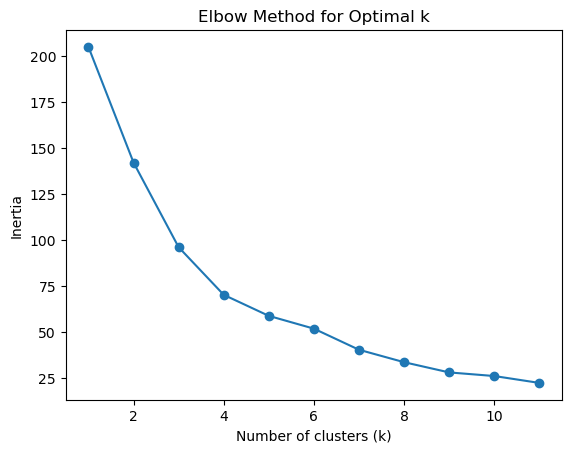

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# List to store inertia values
inertia_values = []

# Compute inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



In [10]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `scaled_df`
# 3. Append the model.inertia_ to the inertia list

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)


c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



,k,inertia
0,1,205.000000
1,2,142.150526
2,3,96.147929
3,4,70.273584
4,5,58.309612
5,6,47.411739
6,7,41.652473
7,8,35.377263
8,9,28.605803
9,10,26.684648


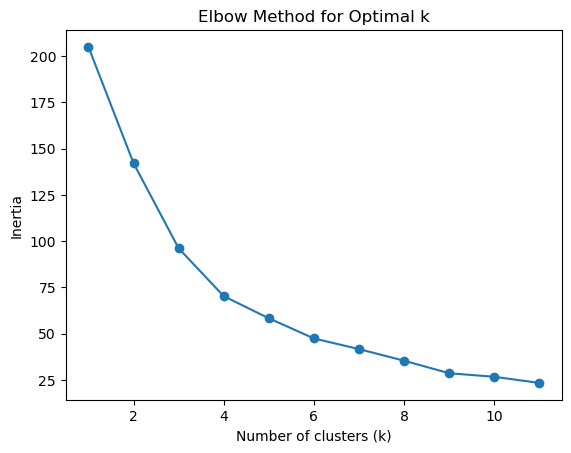

In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow chart, the optimal value for 𝑘
k appears to be 4. This is where the slope of the line starts to level off, indicating that additional clusters beyond 𝑘 = 4
k=4 do not significantly reduce the inertia.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

# Fit the K-means model
kmeans.fit(scaled_df)

# Predict clusters
clusters = kmeans.predict(scaled_df)

# Create a copy of the original DataFrame and add the clusters
df['cluster'] = clusters

# Display the DataFrame with clusters
df.head()



c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1


In [14]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values
print(clusters)


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [16]:
# Create a copy of the DataFrame
df_copy = df.copy()



In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['cluster'] = clusters

# Display sample data
df_copy.head()


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [18]:
import hvplot.pandas

# Create a scatter plot using hvPlot by setting x="price_change_percentage_24h" and y="price_change_percentage_7d".
# Color the graph points with the labels found using K-Means and add the crypto name in the hover_cols parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    colormap='Category10',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters'
)

# Display the scatter plot
scatter_plot



:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)


In [20]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# View the first five rows of the DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,0.795104,-0.662906,-0.153885
ethereum,0.413769,-1.047773,0.157623
tether,-0.195508,0.518261,-0.201535
ripple,-0.260748,0.340601,-0.145741
bitcoin-cash,1.961019,-2.239724,-0.182981


In [21]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print(f"Explained Variance for each component: {explained_variance}")

# Print the total explained variance
print(f"Total Explained Variance: {explained_variance.sum()}")



Explained Variance for each component: [0.47862164 0.26608254 0.1684978 ]
Total Explained Variance: 0.9132019782433117


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.9132.

In [22]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = df.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
0,0.795104,-0.662906,-0.153885
1,0.413769,-1.047773,0.157623
2,-0.195508,0.518261,-0.201535
3,-0.260748,0.340601,-0.145741
4,1.961019,-2.239724,-0.182981


---

### Find the Best Value for k Using the PCA Data

c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

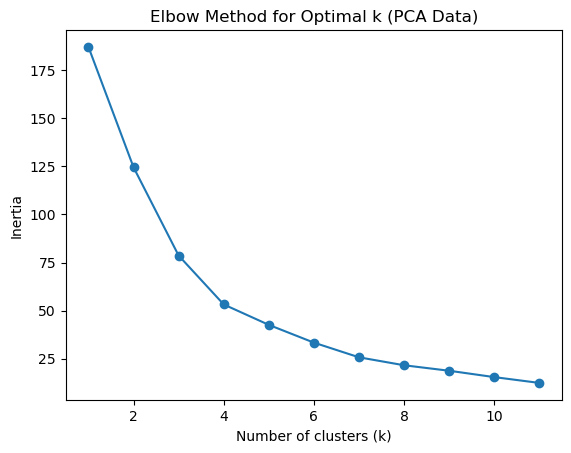

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# List to store inertia values for PCA data
pca_inertia_values = []

# Compute inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    pca_inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': pca_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Plot the elbow curve
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.show()



In [24]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `pca_df`
# 3. Append the model.inertia_ to the inertia list

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia_values_pca.append(kmeans.inertia_)



c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca


,k,inertia
0,1,187.206406
1,2,124.570023
2,3,78.622143
3,4,53.184194
4,5,42.510109
5,6,32.243148
6,7,25.607942
7,8,21.161835
8,9,18.946039
9,10,16.161742


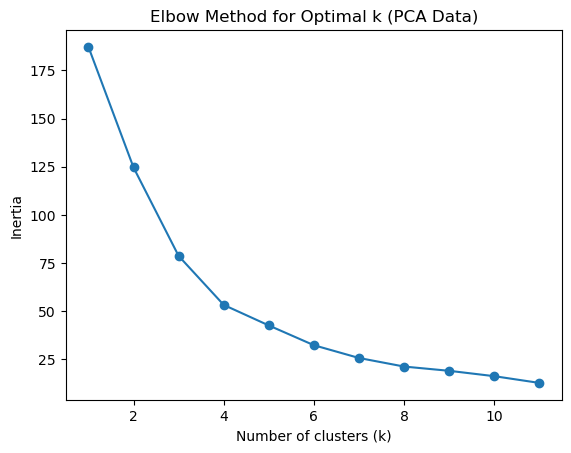

In [26]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**The best value for 𝑘
k when using the PCA data appears to be 4. This is where the elbow in the plot occurs, indicating that the inertia starts to decrease more slowly beyond this point.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. The best 𝑘 value found using the original data was also 4. Therefore, both the original data and the PCA-transformed data suggest that the optimal number of clusters is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4)



In [28]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)


c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\52614\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [29]:

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
print(clusters_pca)



[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [30]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = clusters_pca

# Display sample data
pca_df_copy.head()



,PC1,PC2,PC3,cluster
coin_id,,,,
0,0.795104,-0.662906,-0.153885,0
1,0.413769,-1.047773,0.157623,0
2,-0.195508,0.518261,-0.201535,1
3,-0.260748,0.340601,-0.145741,1
4,1.961019,-2.239724,-0.182981,0


In [32]:
import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster', 
    hover_cols=['coin_id'], 
    title='Cryptocurrency Clusters (PCA Data)'
)

# Display the scatter plot
hvplot.show(scatter_plot)



Launching server at http://localhost:63328


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

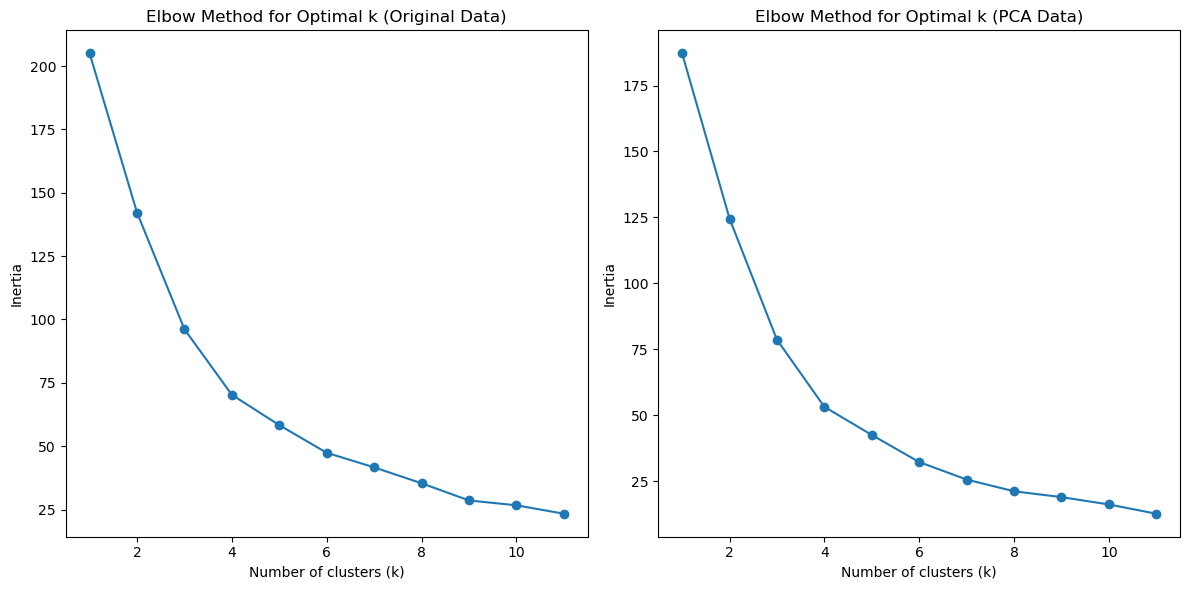

In [33]:
# Composite plot to contrast the Elbow curves

# Plot the elbow curve for the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Original Data)')

# Plot the elbow curve for the PCA data
plt.subplot(1, 2, 2)
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')

plt.tight_layout()
plt.show()


In [37]:
# Add the cluster labels to the original scaled DataFrame
scaled_df['cluster'] = kmeans.labels_

# Plot the scatter plot for the original data with clusters
scatter_original = scaled_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (Original Data)'
)

# Plot the scatter plot for the PCA data with clusters
scatter_pca = pca_df_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA Data)'
)

# Display the composite plot
hvplot.show(scatter_original + scatter_pca)




Launching server at http://localhost:63494


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features (PCA data) for clustering can lead to more distinct and well-separated clusters, as it reduces the dimensionality and retains only the most significant features. The PCA data plot shows better-defined clusters compared to the original data, where the clusters are more spread out and less distinct. This indicates that PCA can enhance the clustering performance by focusing on the principal components that capture the most variance in the data.